In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# load data
# data = pd.read_csv("C://Users//gashm//OneDrive//Desktop//Machine Learning CS 584//data.csv")
data = pd.read_csv("resample_train_smote.csv", encoding='utf-8')
data = data.drop(columns = ['Unnamed: 0'])

test = pd.read_csv("heart.csv", encoding='utf-8')
test = test.drop(columns = ['Unnamed: 0'])


# select features and target variable
X = data.drop(['survived'], axis=1)
y = data['survived']


final_test_X = test.drop(['survived'], axis=1)
final_test_y = test['survived']

In [3]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# feature selection using L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear')
selector = SelectFromModel(logreg)
selector.fit(X_train, y_train)

# print selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: ['id', 'wait', 'age', 'acceptyear', 'prior', 'transplant', 'survtime']


In [4]:
# train logistic regression model with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
logreg.fit(X_train_selected, y_train)

# make predictions on the testing set
y_pred = logreg.predict(X_test_selected)
# y_pred = rf.predict(X_test)
tr_pred = logreg.predict(X_train)
final_pred = logreg.predict(final_test_X)
# evaluate model accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

tr_accuracy = accuracy_score(y_train, tr_pred)
print("Training Accuracy:", tr_accuracy)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Validation set Accuracy:", accuracy)

test_accuracy = accuracy_score(final_test_y, final_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9701058201058201
Validation set Accuracy: 0.9604938271604938
Testing Accuracy: 0.563953488372093


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [6]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.977491961414791
Recall: 0.9812782440284055


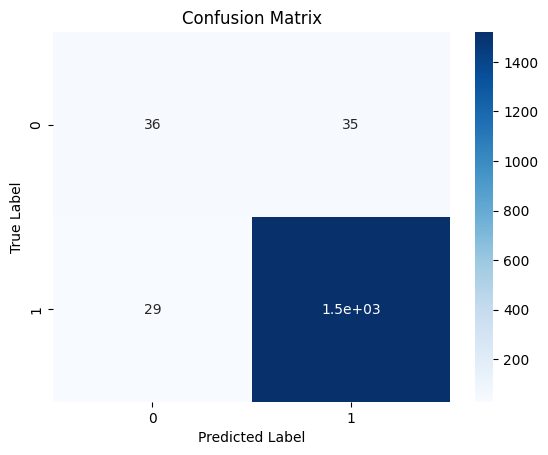

In [7]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()